Para demostrar el uso de una Red Neuronal Long Short-Term Memory (LSTM) en series de tiempo, incluyendo pronósticos para datos nuevos y la visualización de estos pronósticos en un gráfico con un color distinto, seguiré los siguientes pasos en el código de Python:

Generar datos de serie temporal simulados para entrenamiento.
Construir y entrenar un modelo LSTM.
Generar un conjunto de datos nuevos para pronóstico.
Realizar pronósticos y visualizarlos en un gráfico junto con los datos de entrenamiento, destacando los pronósticos en un color diferente.

Epoch 1/5
32/32 [==============================] - 2s 24ms/step - loss: 12769.2510
Epoch 2/5
32/32 [==============================] - 1s 24ms/step - loss: 0.8342
Epoch 3/5
32/32 [==============================] - 1s 23ms/step - loss: 0.8492
Epoch 4/5
32/32 [==============================] - 1s 24ms/step - loss: 0.8475
Epoch 5/5
4/4 [==============================] - 0s 8ms/step


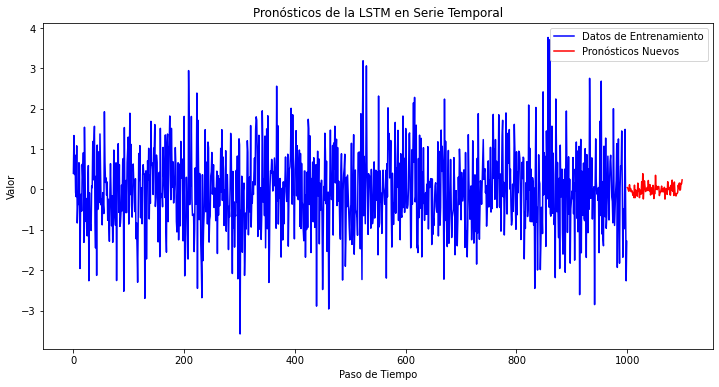

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Paso 1: Generar datos de serie temporal simulados
np.random.seed(0)
timesteps = 100  # Longitud de cada serie temporal
data_size = 1000  # Número de muestras
data = np.random.randn(data_size, timesteps)
labels = data[:, -1]  # Supongamos que queremos predecir el último punto

# Paso 2: Crear y entrenar el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
X = np.expand_dims(data, axis=2)
model.fit(X, labels, epochs=5, batch_size=32)

# Paso 3: Generar nuevos datos para pronóstico
new_data = np.random.randn(100, timesteps)
new_data = np.expand_dims(new_data, axis=2)

# Paso 4: Realizar pronósticos
predictions = model.predict(new_data)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(labels, label='Datos de Entrenamiento', color='blue')
plt.plot(range(data_size, data_size + 100), predictions.flatten(), label='Pronósticos Nuevos', color='red')
plt.title('Pronósticos de la LSTM en Serie Temporal')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


Este código realiza lo siguiente:

Genera una serie de datos de tiempo simulados.
Construye una red LSTM con una capa oculta y una capa de salida.
Entrena el modelo con los datos generados.
Genera un conjunto de datos nuevo para realizar pronósticos.
Realiza los pronósticos y los visualiza en un gráfico, diferenciando los datos de entrenamiento y los pronósticos con colores distintos.
Este ejemplo es básico y está destinado a demostrar cómo estructurar una LSTM para series de tiempo. En aplicaciones reales, es importante considerar la preprocesación adecuada de los datos, la selección de la arquitectura de la red y la validación del modelo. Además, este código asume que queremos predecir el último punto de cada secuencia; en la práctica, deberías adaptar el enfoque de modelado a las características específicas de tu problema y tus datos.